# Author: E.Mallikarjun Yadav

## Technical Task1: Prediction Using Supervised Learning(Ml)

In this task, we will predict the percentage of marks that a student is expected to score based upon
the number of hours they studied. This is a Simple Linear Regression Task as it shown two variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# #step1: Reading the data from online source

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# step2: Data Visualization

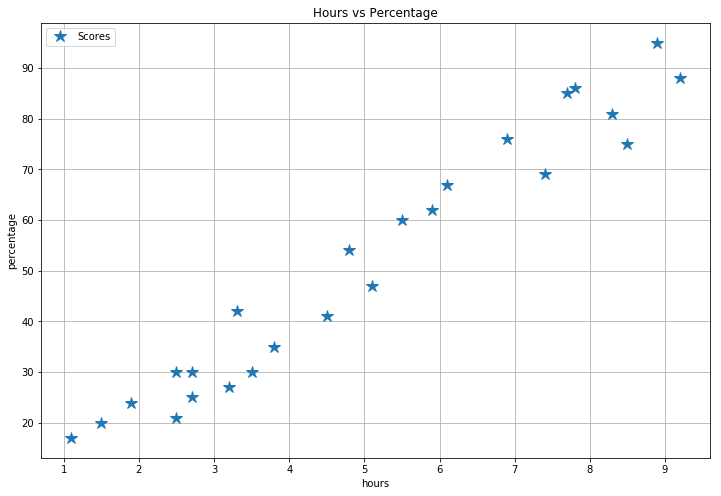

In [27]:
#plotting the distribution of score
plt.rcParams["figure.figsize"]=[12,8]
data.plot(x="Hours",y="Scores",style='*',markersize=12)
plt.title("Hours vs Percentage")
plt.xlabel("hours")
plt.ylabel("percentage")
plt.grid()


# step3: Preparing the data

The next step is to divide the data into attributes(inputs) and labels(output)

In [38]:
x=data.iloc[:,:-1].values

In [39]:
y=data.iloc[:,1].values

In [51]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [50]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# step4: Algorithm Training

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
regressor=LinearRegression()

In [55]:
x_train.shape

(20, 1)

In [56]:
y_train.shape

(20,)

In [57]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting the line

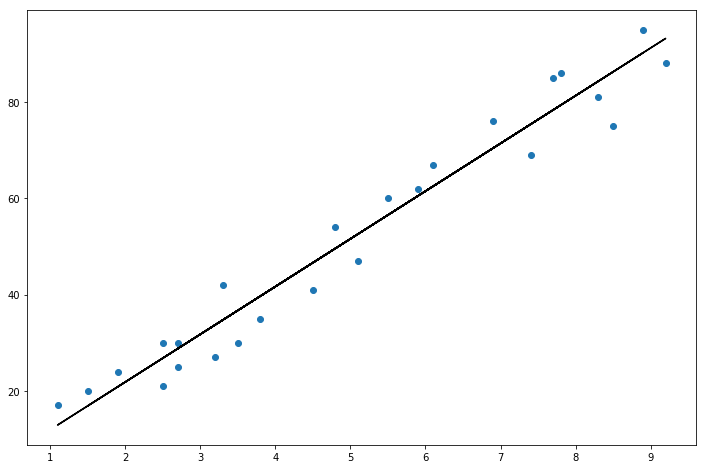

In [62]:
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line,color= "black")

# Making Predictions

In [63]:
print(x_test)
y_predict=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# comapring actual vs predicted

In [66]:
data=pd.DataFrame({"Actual" : y_test,"Predicted" : y_predict})

In [68]:
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [69]:
print("tarining score:",regressor.score(x_train,y_train))
print("testing score:",regressor.score(x_test,y_test))

tarining score: 0.9515510725211553
testing score: 0.9454906892105356


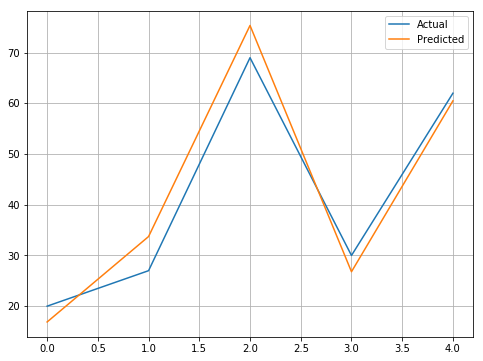

In [73]:
data.plot(kind='line',figsize=(8,6))
plt.grid()

# Teating our own data

In [78]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_predict=regressor.predict(test)
print("number of hours = {}".format(hours))
print("predicted score = {}".format(own_predict[0]))

number of hours = 9.25
predicted score = 93.69173248737538


# Evaluating the model

In [79]:
from sklearn import metrics

In [84]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Absolute Error:",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Absolute Error: 4.6474476121003665
